In [1]:
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import warnings
import time
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn import svm
from sklearn.datasets import make_circles, make_moons, make_blobs

In [2]:
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers
random_state = 170

In [3]:
noisy_circles = make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = make_moons(n_samples=n_samples, noise=0.05)
blobs = make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

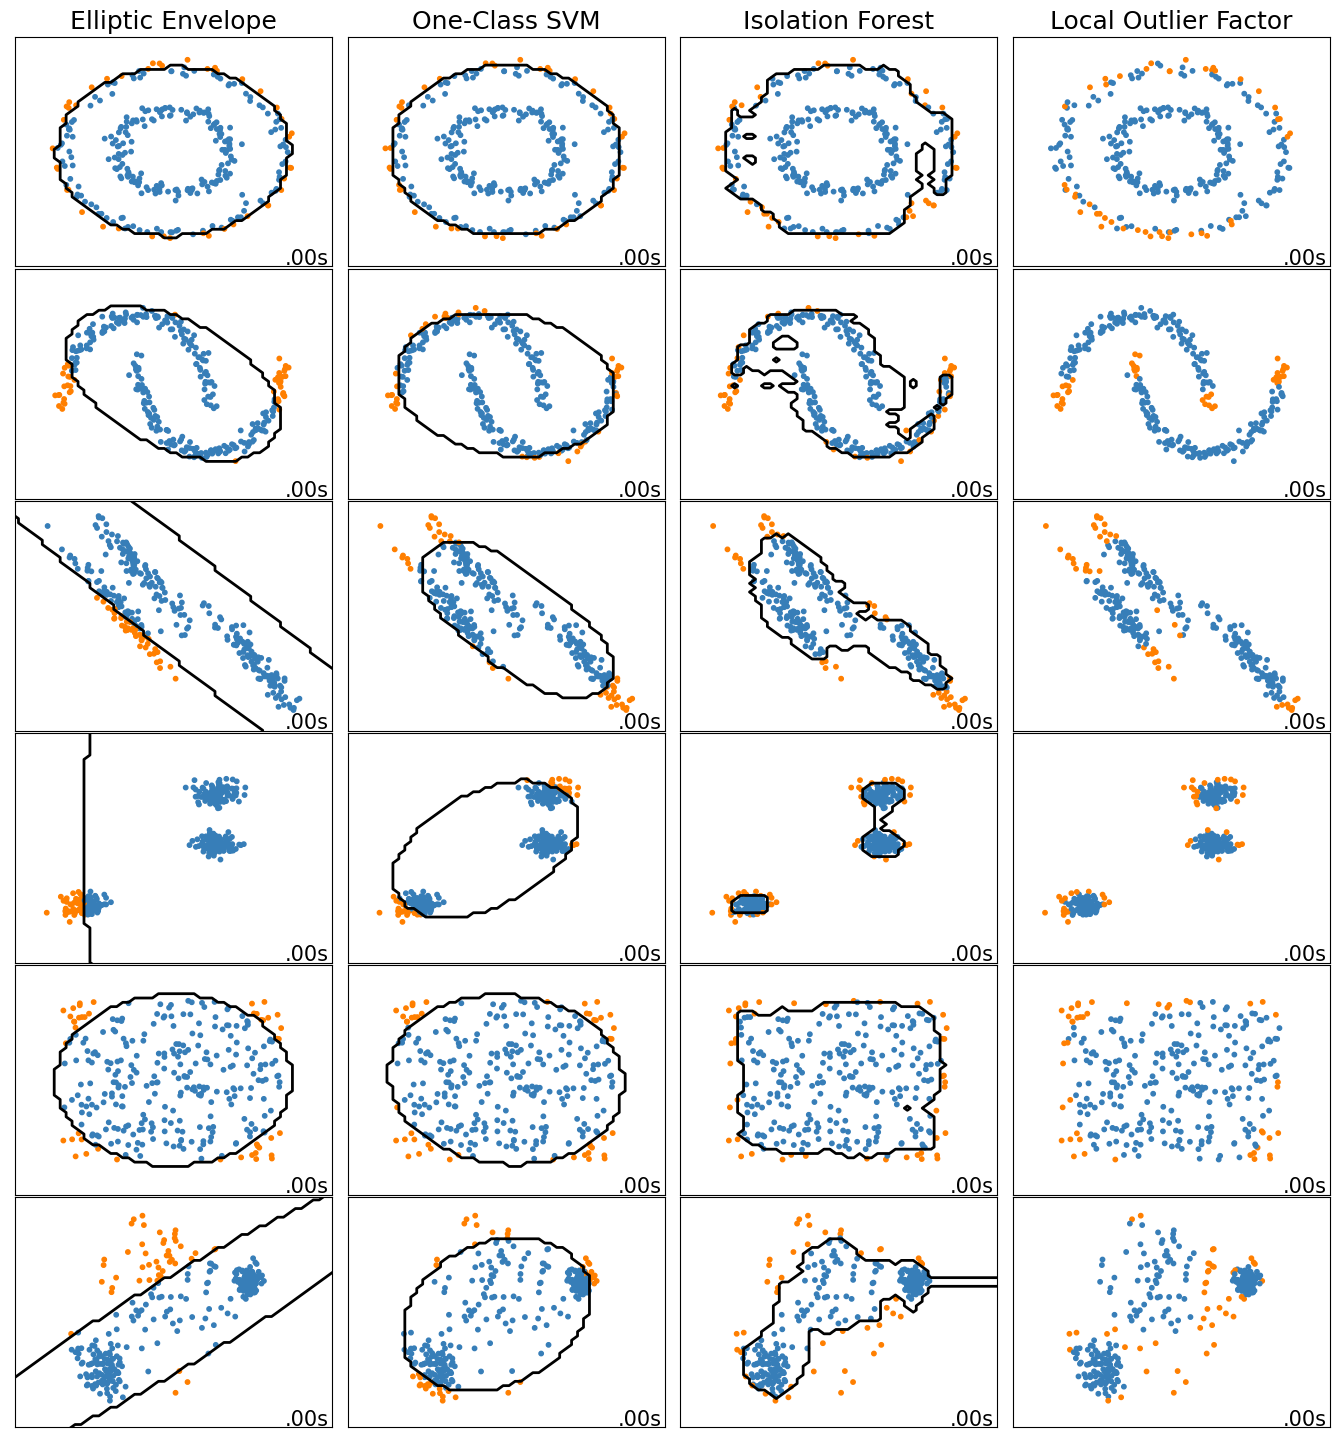

In [4]:
colors = np.array(['#377eb8' , '#ff7f00'])
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1

datasets = [
    (noisy_circles, {"n_clusters": 2}),
    (noisy_moons, {"n_clusters": 2}),
    (aniso, {"n_neighbors": 3}),
    (blobs, {}),
    (no_structure, {}),
    (varied, {"n_neighbors": 3}),
]

xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    params = algo_params

    X, y = dataset
    X = StandardScaler().fit_transform(X)
    
    clustering_algorithms = [
    ("Elliptic Envelope", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))
    ]

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        t1 = time.time()
        
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)
            
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred - 1) // 2])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

from sklearn.cluster import DBSCAN 

dbscan = DBSCAN(eps=0.15)
dbscan.fit(X)
set(dbscan.labels_)

{-1, 0, 1, 2, 3, 4, 5}

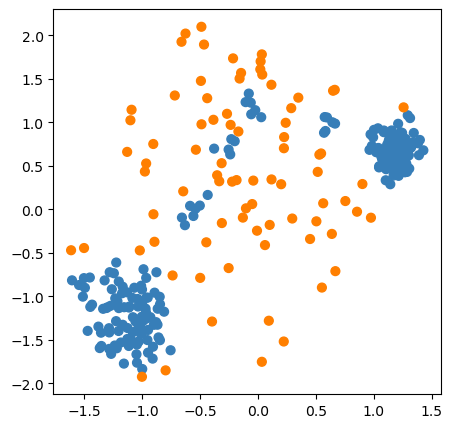

In [6]:
plt.figure (figsize=(5,5))
outliers= np.where(dbscan.labels_==-1, 1,0)
plt.scatter(X[:, 0], X[:, 1], s=40, color=colors[outliers])

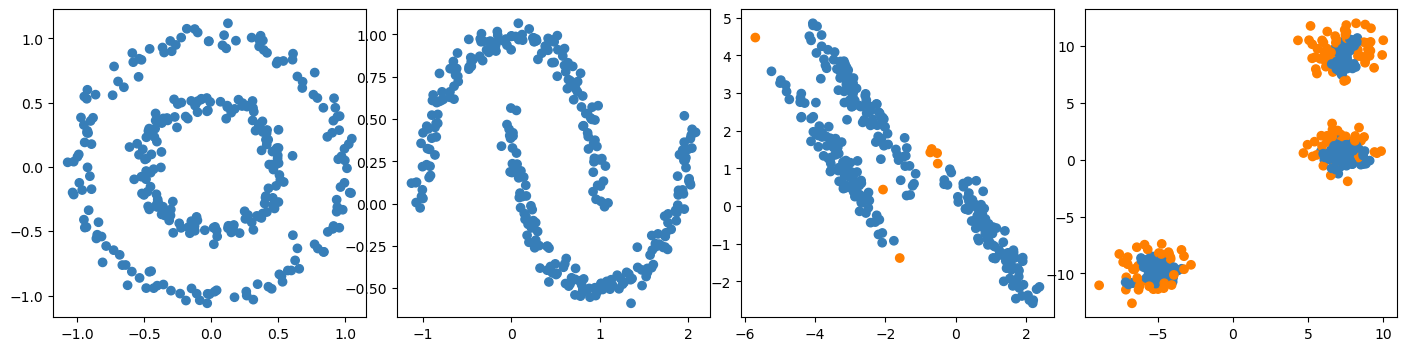

In [7]:
_, subaxes = plt.subplots(1, 4, figsize=(14,4))
plt.subplots_adjust(left=.02, right=.98, wspace=.1)
for ax, X in zip(subaxes, datasets):
    X = X[0][0]
    dbscan = DBSCAN(eps=0.4, min_samples=5)
    dbscan.fit(X)
    outliers= np.where(dbscan.labels_==-1, 1,0)    
    ax.scatter(X[:,0],X[:,1], color=colors[outliers])
